<img src="Images/slide_1_clustering.png" width="700" height="700">


<img src="Images/slide_2_clustering.png" width="700" height="700">

## Text Vectorization

Question: What is text vectorization?

Answer: The process to transform text data to numerical vectors

## Options for Text Vectorization

- Count the number of unique words for each sentence (BOW)

- Assign weights to each word in the sentences

- Map each word to a number (dictionary with words as key and numbers as values) and represent each sentences as the sequence of numbers 


## Bag-of-Word Matrix

- BoW is a matrix where its rows are sentences and its columns are unique words for the whole documents (corpus)

- We can write down our own function to return BoW matrix based 

- Below, we will seehow we can build BoW by calling sklearn methods

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# X.torray() is BoW
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


## How to get unique words?

In [9]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


## Clustering

- Clustering is an unsupervised learning method

- This is very often used **because we usually don’t have labeled data**

- K-Means clustering is one of the popular clustering algorithm

- The goal of any cluster algorithm is to find groups (clusters) in the given data

## Examples of Clustering

- Cluster movie dataset -> We expect the movies which their genres are similar be clustred in the same group

- News Article Clustering -> We want the News related to science be in the same group, News related to sport be in the same group

## Demo of K-means

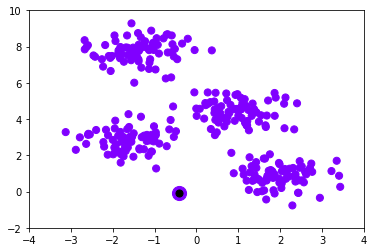

<function figures.plot_kmeans_interactive.<locals>._kmeans_step(frame=0, n_clusters=4)>

In [14]:
from figures import plot_kmeans_interactive

plot_kmeans_interactive()

## K-means algorithm:

Assume the inputs are $s_1$, $s_2$, ..., $s_n$. Choose $K$ arbitrarily.

Step 1 - Pick $K$ random points as cluster centers (called centroids)

Step 2 - Assign each $s_i$ to nearest cluster by calculating its distance to each centroid

Step 3 - Find new cluster center by taking the average of the assigned points

Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change

## Lets generate sample dataset

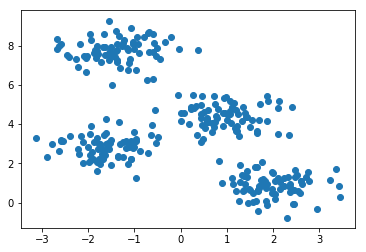

In [18]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1])

### How to choose correct number of cluster (K)?

Choose arbitrary K

1- Compute all of the distances of red points to red centroid

2- Do step (1) for other colors (purple, blue, ...)

3- Add them up

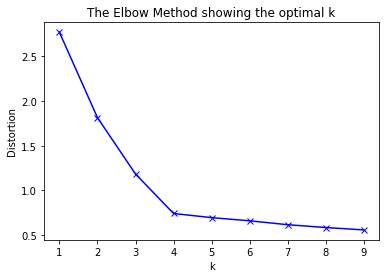

In [21]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Another implementation for obtaining the appropriate number of cluster 

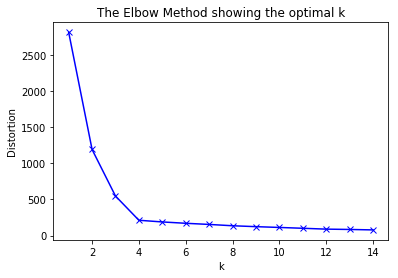

In [22]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Combine Text Vectorization and Clustering the Texts

- Based on the documents that is given, we want to cluster sentences 

- To do this: We need two steps:

    - Vectorize the sentences (texts)
    
    - Aplly Kmeans to cluster our vectorized sentences (texts)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[0]
[1]


## Other clustering methods and comparison:

http://scikit-learn.org/stable/modules/clustering.html

## Resources:

- https://www.youtube.com/watch?v=FrmrHyOSyhE

- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Summary

- Inorder to work with text, we should transform it into vector of numbers

- We learned three methods for text vectorization

- Clustering as an unseprvised learning algorithm obtains the groups based on geometric 

